In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


acousticness — float — A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability — float — Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy — float — Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

instrumentalness — float — Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

liveness — float — Detects the presence of an audience in the recording.

loudness — float — The overall loudness of a track in decibels (dB).

speechiness — float — Speechiness detects the presence of spoken words in a track.

valence — float — A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

tempo — float — The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

mode — int — Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

key — int — The estimated overall key of the track.

explicit: The binary value whether the track contains explicit content or not, (0 = No explicit content, 1 = Explicit content).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install --user seaborn==0.11.0

     |████████████████████████████████| 283 kB 5.4 MB/s 


In [ ]:
df_tracks = pd.read_csv('/content/drive/MyDrive/tracks.csv')
df_tracks.sample(20)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
467293,4dKu1HkVL1xh96F1JfDTrn,Shoulder to the Wheel,46,199573,0,['Saves The Day'],['5gWhlJBlLQGLOgYWO8lwCU'],1999,0.350,0.958,4,-4.597,1,0.0949,0.000436,0.000000,0.3140,0.555,190.501,4
570975,0zT4Uyd6PAfZPcTOHRy7YE,The Christmas Song,23,172200,0,['The Jackson 5'],['2iE18Oxc8YSumAU232n4rW'],1970-10-15,0.404,0.444,1,-7.607,1,0.0289,0.703000,0.000000,0.1580,0.435,134.005,4
60635,2JN57QFclho4vExKPq6OYg,Stop Me If You Think You've Heard This One Bef...,55,215573,0,['The Smiths'],['3yY2gUcIsjMr8hjo51PoJ8'],1987-09-28,0.569,0.856,0,-6.668,0,0.0281,0.004800,0.000007,0.0873,0.660,134.181,4
475718,7x3Vdm9yeVX2vUSlvgiVEK,Snapchat Sin Ropa,50,192340,0,['DJ Alan Gomez'],['6oMRQ5H3A2XA5I3RG3leni'],2018-12-24,0.840,0.670,5,-4.203,0,0.2460,0.457000,0.000123,0.0672,0.667,104.014,4
68570,1ZGs4W7LBJy68hRPTsvMFc,Para no olvidar,62,234813,0,['Los Rodriguez'],['3XkJyJgJDxnjdQgH0zfT8K'],1995-05-21,0.593,0.926,7,-3.696,0,0.0322,0.242000,0.000002,0.2070,0.961,104.854,4
78190,3KDClBkoakbdF0pSdF2PP7,Descontrolado,58,174521,0,['Jóvenes Pordioseros'],['6UYYp6Xo2NHP7AxNnR0rn4'],2004-10-21,0.569,0.809,9,-5.069,1,0.0265,0.011300,0.000000,0.1910,0.772,140.037,4
161126,3AqXLHilc5BludyqVTKrsB,Katulaulajan serenadi,0,169267,0,['Leif Wager'],['1KRegIWNORn5xfSm1qmq8n'],1959,0.373,0.185,2,-11.833,1,0.0360,0.710000,0.000000,0.1670,0.492,117.764,4
71239,7gZOxmcYAquTLGBg5NeRQh,Starman - 1997 Remaster,49,260240,0,['David Bowie'],['0oSGxfWSnnOXhD2fKuz2Gy'],1997-10-27,0.446,0.395,5,-13.371,1,0.0275,0.200000,0.000000,0.1100,0.517,100.415,4
177342,3nSiEJPNSH86D7JTFsyyly,Meidän biisi,40,215306,0,['Arttu Wiskari'],['3XqH4FcUOrw2gw7L3BBaDn'],2017-06-07,0.729,0.800,0,-4.568,1,0.0694,0.033000,0.000000,0.4360,0.859,94.008,4
150801,2UtHtG6oXit4gAiOc8pDxf,No Me Digas Que Te Vas,36,223960,0,['José José'],['4mN0qcMxWX8oToqfDPM5yV'],1992-03-03,0.281,0.434,2,-16.797,0,0.0531,0.028300,0.000000,0.3590,0.375,164.243,4


In [ ]:
pd.isna(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [ ]:
df_tracks.loc[:, df_tracks.isna().any()]

,name
0,Carve
1,Capítulo 2.16 - Banquero Anarquista
2,Vivo para Quererte - Remasterizado
3,El Prisionero - Remasterizado
4,Lady of the Evening
...,...
586667,云与海
586668,blind
586669,What They'll Say About Us
586670,A Day At A Time


In [ ]:
df_tracks1 = df_tracks.dropna()
df_tracks1

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [ ]:
df_tracks.duplicated().sum()

0

In [ ]:
df_tracks1.isna().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [ ]:
df_tracks['duration_in_second'] = df_tracks['duration_ms'].apply(lambda x: round(x/1000))
df_tracks.drop('duration_ms', inplace=True, axis=1)

In [ ]:
df_tracks1 = df_tracks
df_tracks1['year'] = pd.to_datetime(df_tracks['release_date']).dt.year
df_tracks1['month'] = pd.to_datetime(df_tracks['release_date']).dt.month
df_tracks1['day'] = pd.to_datetime(df_tracks['release_date']).dt.day
df_tracks1

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_in_second,year,month,day
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,127,1922,2,22
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,98,1922,6,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,182,1922,3,21
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,177,1922,3,21
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,163,1922,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,258,2020,9,26
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,153,2020,10,21
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,188,2020,9,2
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,142,2021,3,5


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'mode'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'acousticness'),
 Text(8.5, 0, 'instrumentalness'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo'),
 Text(12.5, 0, 'time_signature'),
 Text(13.5, 0, 'duration_in_second'),
 Text(14.5, 0, 'year'),
 Text(15.5, 0, 'month'),
 Text(16.5, 0, 'day')]

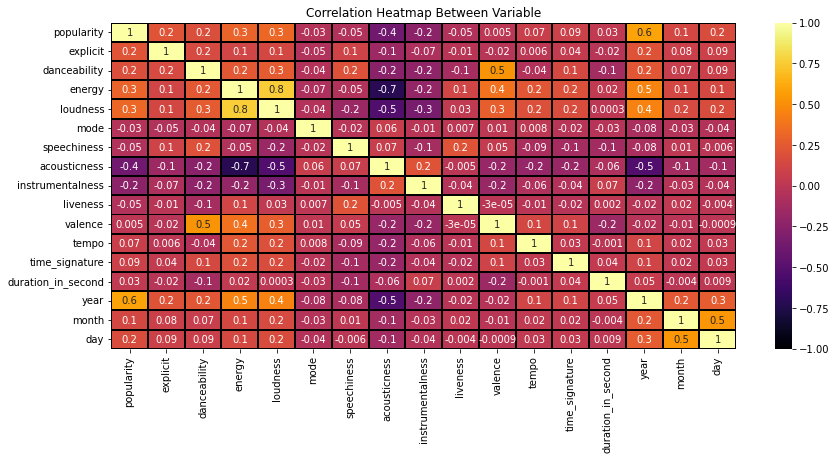

In [ ]:
corr_df=df_tracks1.drop(['key'],axis=1).corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='black')
heatmap.set_title('Correlation Heatmap Between Variable')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

from correlation heatmap, loudness and energy has strong correlation, year and popularity, and valence and danceability.

In [ ]:
df_reg = df_tracks1.sample(int(0.004*len(df_tracks1)))

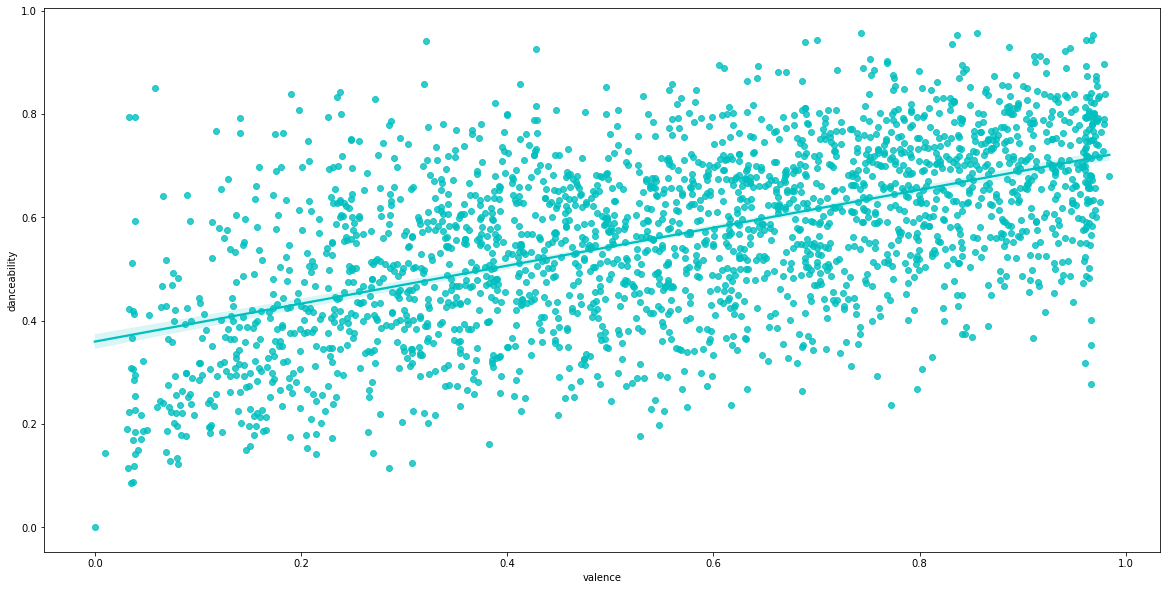

In [ ]:
dance_dat1= df_reg['danceability']
val_dat1= df_reg['valence']
plt.figure(figsize=(20,10))
sns.regplot(data=df_reg, y= dance_dat1, x= val_dat1, color= 'c' )

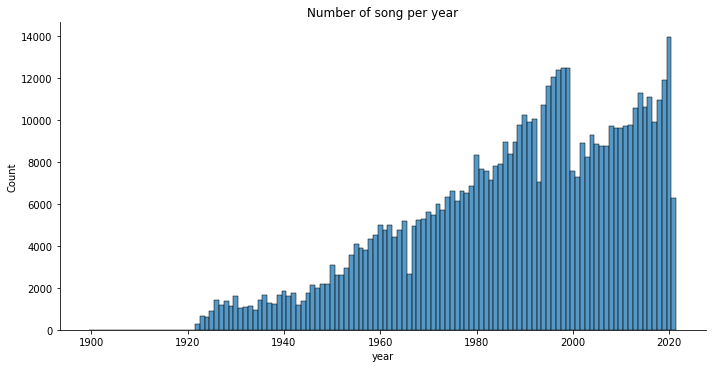

In [ ]:
sns.displot(data= df_tracks1['year'], discrete=True, aspect=2, height=5, kind='hist').set(title= 'Number of song per year')

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 <a list of 9 Text major ticklabel objects>)

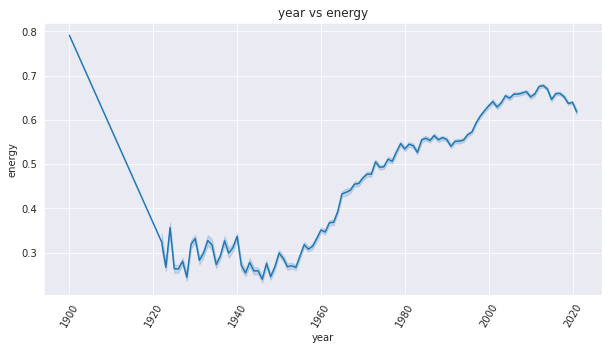

In [ ]:
energy_dat= df_tracks1['energy']
year_dat= df_tracks1['year']
sns.set_style(style='darkgrid')
fig_dims= (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=year_dat, y=energy_dat, ax=ax).set(title="year vs energy")
plt.xticks(rotation=60)



In [ ]:
df_tracks1 = df_tracks1.query('year>1950', inplace=False).sort_values(by="popularity", ascending=False)
df_tracks1

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_in_second,year,month,day
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198,2021,3,19
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.132,143.874,4,242,2021,1,8
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.1500,0.472,149.996,4,133,2021,1,6
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.2030,0.553,83.970,4,160,2020,12,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.5430,0.644,118.051,4,216,2020,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117056,4QQXmT4y2Slm2znZan8yG6,California Dreamin',0,0,['Smashlouse'],['0xcPljJ2pNCAcqT8c6SWnC'],2010-07-01,0.636,0.453,2,-8.325,0,0.0242,0.1000,0.000000,0.5190,0.551,108.636,4,162,2010,7,1
117055,0aePHzg6EkLXlm0mbweXJm,You Can't Hurry Love,0,0,['Smashlouse'],['0xcPljJ2pNCAcqT8c6SWnC'],2010-07-01,0.678,0.631,8,-11.280,1,0.0768,0.0727,0.000000,0.0924,0.748,97.839,4,172,2010,7,1
117054,0TdEAL5lW3MThbn8ggO8of,Strangers In The Night,0,0,['Smashlouse'],['0xcPljJ2pNCAcqT8c6SWnC'],2010-07-01,0.340,0.359,7,-11.628,0,0.0286,0.4600,0.000014,0.0903,0.340,86.395,4,170,2010,7,1
117053,5CCkHxtCxLxV4uLPZPwEVT,My Love,0,0,['Smashlouse'],['0xcPljJ2pNCAcqT8c6SWnC'],2010-07-01,0.551,0.468,9,-11.623,1,0.0351,0.5010,0.000000,0.1070,0.837,90.259,4,155,2010,7,1


(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]), <a list of 10 Text major ticklabel objects>)

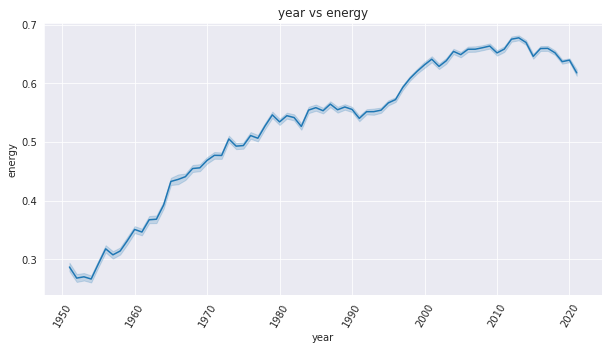

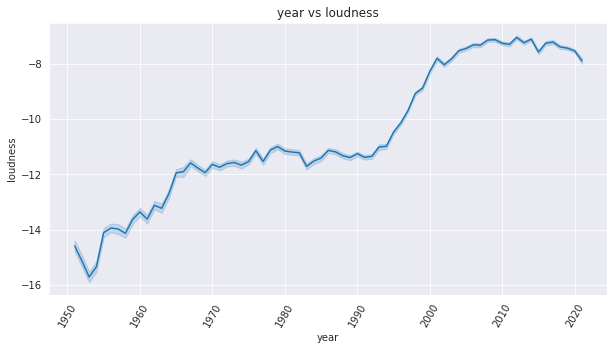

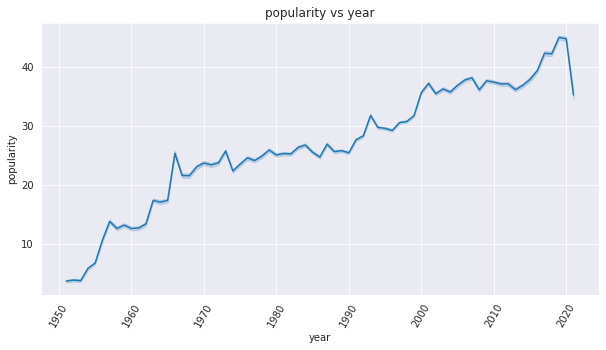

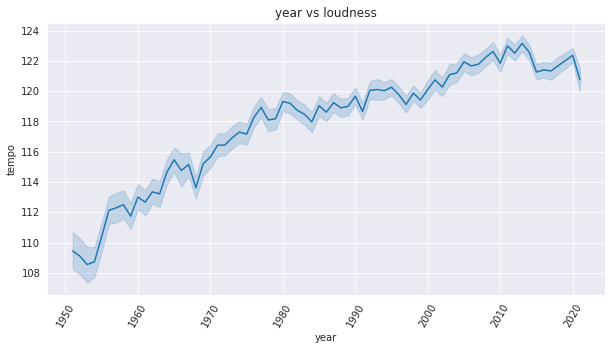

In [ ]:
energy_dat= df_tracks1['energy']
year_dat= df_tracks1['year']
sns.set_style(style='darkgrid')
fig_dims= (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=year_dat, y=energy_dat, ax=ax).set(title="year vs energy")
plt.xticks(rotation=60)


loudness_dat= df_tracks1['loudness']
year_dat= df_tracks1['year']
sns.set_style(style='darkgrid')
fig_dims= (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=year_dat, y=loudness_dat, ax=ax).set(title="year vs loudness")
plt.xticks(rotation=60)


popularity_dat= df_tracks1['popularity']
year_dat= df_tracks1['year']
sns.set_style(style='darkgrid')
fig_dims= (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=year_dat, y=popularity_dat, ax=ax).set(title="popularity vs year")
plt.xticks(rotation=60)


loudness_dat= df_tracks1['tempo']
year_dat= df_tracks1['year']
sns.set_style(style='darkgrid')
fig_dims= (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=year_dat, y=loudness_dat, ax=ax).set(title="year vs loudness")
plt.xticks(rotation=60)

from 1960, music has evolved as a result of the emergence of genres of rock music, blues, metal, death metal, and so on.

(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]), <a list of 10 Text major ticklabel objects>)

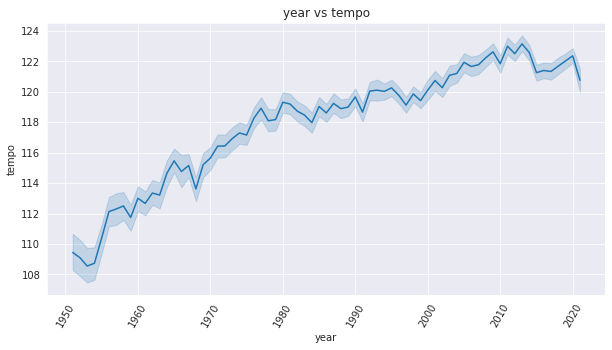

In [ ]:
energy_dat= df_tracks1['tempo']
year_dat= df_tracks1['year']
sns.set_style(style='darkgrid')
fig_dims= (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=year_dat, y=energy_dat, ax=ax).set(title="year vs tempo")
plt.xticks(rotation=60)

just like loudness and energy, tempo also develops.

In [ ]:
df_tracks2 = df_tracks1.query('popularity>69', inplace=False).sort_values('popularity', ascending=False)
df_tracks2

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_in_second,year,month,day
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198,2021,3,19
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.132,143.874,4,242,2021,1,8
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.1500,0.472,149.996,4,133,2021,1,6
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.2030,0.553,83.970,4,160,2020,12,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.5430,0.644,118.051,4,216,2020,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188271,0uI7yAKUf52Cn7y3sYyjiX,3 Nights,70,0,['Dominic Fike'],['6USv9qhCn6zfxlBQIYJ9qs'],2018-10-16,0.815,0.518,7,-6.594,0,0.0897,0.2230,0.000000,0.1040,0.877,151.891,4,178,2018,10,16
69468,6hFHsQWB7HdVrSe7efRR82,Como te extraño mi amor,70,0,['Café Tacvba'],['09xj0S68Y1OU1vHMCZAIvz'],1996-10-25,0.791,0.759,9,-5.670,1,0.0370,0.0823,0.000044,0.0993,0.917,124.725,4,215,1996,10,25
78449,5OiaAaIMYlCZONyDBxqk4G,First Day Of My Life,70,0,['Bright Eyes'],['5o206eFLx38glA2bb4zqIU'],2005-01-25,0.468,0.201,4,-17.024,1,0.0388,0.9150,0.000083,0.0952,0.383,94.422,4,189,2005,1,25
211634,3OL6rKs4tpYCdPZ9SEx50p,Corazón Sin Vida,70,0,"['Aitana', 'Sebastian Yatra']","['7eLcDZDYHXZCebtQmVFL25', '07YUOmWljBTXwIseAU...",2020-10-02,0.480,0.572,2,-4.013,1,0.0412,0.1690,0.000000,0.0711,0.452,89.890,4,182,2020,10,2


In [ ]:
data_simple = df_tracks2[['id', 'popularity', 'energy', 'valence', 'tempo', 'danceability']]
data_simple

,id,popularity,energy,valence,tempo,danceability
93802,4iJyoBOLtHqaGxP12qzhQI,100,0.696,0.464,90.030,0.677
93803,7lPN2DXiMsVn7XUKtOW1CS,99,0.436,0.132,143.874,0.585
93804,3Ofmpyhv5UAQ70mENzB277,98,0.695,0.472,149.996,0.778
92811,6tDDoYIxWvMLTdKpjFkc1B,97,0.524,0.553,83.970,0.653
92810,5QO79kh1waicV47BqGRL3g,97,0.826,0.644,118.051,0.680
...,...,...,...,...,...,...
188271,0uI7yAKUf52Cn7y3sYyjiX,70,0.518,0.877,151.891,0.815
69468,6hFHsQWB7HdVrSe7efRR82,70,0.759,0.917,124.725,0.791
78449,5OiaAaIMYlCZONyDBxqk4G,70,0.201,0.383,94.422,0.468
211634,3OL6rKs4tpYCdPZ9SEx50p,70,0.572,0.452,89.890,0.480


In [ ]:
data_simple.describe()

,popularity,energy,valence,tempo,danceability
count,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000
mean,74.580636,0.642925,0.520668,121.890716,0.650059
std,4.286470,0.186795,0.233599,29.462496,0.150184
min,70.000000,0.000020,0.000000,0.000000,0.000000
25%,71.000000,0.525000,0.339500,98.282500,0.554000
50%,74.000000,0.662000,0.518000,120.063000,0.663000
75%,77.000000,0.786000,0.707000,140.194000,0.758500
max,100.000000,0.997000,0.985000,220.099000,0.980000


UNIVARIATE ANALYSIS:

the purpose of univariate analysis is to improve understanding towards the data.

univariate analysis is an exercise to visually analyze each cloumn one by one.

In [ ]:
numericals = ['popularity', 'valence', 'tempo', 'danceability']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

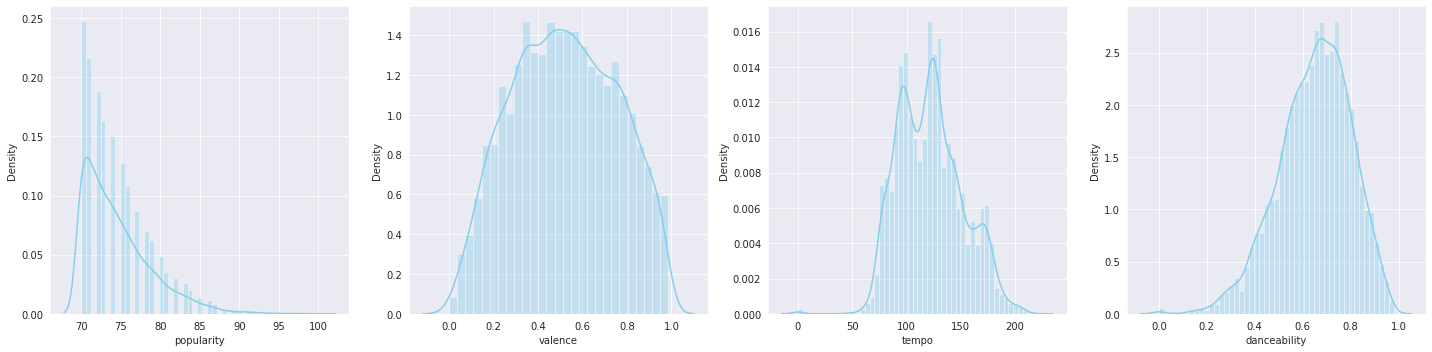

In [ ]:
features = numericals
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=data_simple[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

as we can see, popularity has negatively skewed, altough danceability and tempo has little positively skewed.

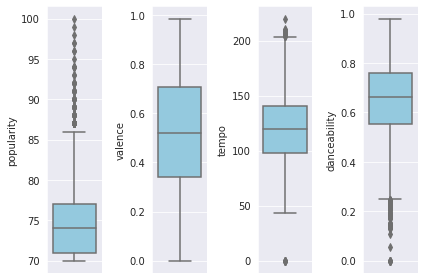

In [ ]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data_simple[features[i]], color='skyblue')
    plt.tight_layout()

with barplot we can see the outiers on popularity, tempo, and danceability but i can not remove the outliers because it is important too for analyzing the data.

In [ ]:
amount_of_time = df_tracks1.groupby(by='artists')['duration_in_second'].sum().sort_values(ascending=False)[:15]
amount_of_time

artists
['Die drei ???']          308351
['Lata Mangeshkar']       288463
['TKKG Retro-Archiv']     200022
['Mohammed Rafi']         178474
['Queen']                 177886
['Pink Floyd']            174158
['Miles Davis']           162870
['The Rolling Stones']    154517
['Umm Kulthum']           149090
['Julio Iglesias']        133121
['Metallica']             130809
['Kishore Kumar']         125069
['Bob Dylan']             118326
['Fleetwood Mac']         117314
['Ella Fitzgerald']       116837
Name: duration_in_second, dtype: int64

In [ ]:
df_tracks2['id_artists']=df_tracks2.id_artists.str.replace('[',' ')
df_tracks2['id_artists']=df_tracks2.id_artists.str.replace(']',' ')
df_tracks2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_in_second,year,month,day
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","'1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198,2021,3,19
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,1,['Olivia Rodrigo'],'1McMsnEElThX1knmY4oliG',2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.132,143.874,4,242,2021,1,8
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,0,['Masked Wolf'],'1uU7g3DNSbsu0QjSEqZtEd',2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.1500,0.472,149.996,4,133,2021,1,6
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,0,['Kali Uchis'],'1U1el3k54VvEUzo3ybLPlM',2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.2030,0.553,83.970,4,160,2020,12,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,1,['The Weeknd'],'1Xyo4u8uXC1ZmMpatF05PJ',2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.5430,0.644,118.051,4,216,2020,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188271,0uI7yAKUf52Cn7y3sYyjiX,3 Nights,70,0,['Dominic Fike'],'6USv9qhCn6zfxlBQIYJ9qs',2018-10-16,0.815,0.518,7,-6.594,0,0.0897,0.2230,0.000000,0.1040,0.877,151.891,4,178,2018,10,16
69468,6hFHsQWB7HdVrSe7efRR82,Como te extraño mi amor,70,0,['Café Tacvba'],'09xj0S68Y1OU1vHMCZAIvz',1996-10-25,0.791,0.759,9,-5.670,1,0.0370,0.0823,0.000044,0.0993,0.917,124.725,4,215,1996,10,25
78449,5OiaAaIMYlCZONyDBxqk4G,First Day Of My Life,70,0,['Bright Eyes'],'5o206eFLx38glA2bb4zqIU',2005-01-25,0.468,0.201,4,-17.024,1,0.0388,0.9150,0.000083,0.0952,0.383,94.422,4,189,2005,1,25
211634,3OL6rKs4tpYCdPZ9SEx50p,Corazón Sin Vida,70,0,"['Aitana', 'Sebastian Yatra']","'7eLcDZDYHXZCebtQmVFL25', '07YUOmWljBTXwIseAU...",2020-10-02,0.480,0.572,2,-4.013,1,0.0412,0.1690,0.000000,0.0711,0.452,89.890,4,182,2020,10,2


In [ ]:
data_simple['tempo'] = data_simple['tempo'].astype(int)
data_simple

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,popularity,energy,valence,tempo,danceability
93802,4iJyoBOLtHqaGxP12qzhQI,100,0.696,0.464,90,0.677
93803,7lPN2DXiMsVn7XUKtOW1CS,99,0.436,0.132,143,0.585
93804,3Ofmpyhv5UAQ70mENzB277,98,0.695,0.472,149,0.778
92811,6tDDoYIxWvMLTdKpjFkc1B,97,0.524,0.553,83,0.653
92810,5QO79kh1waicV47BqGRL3g,97,0.826,0.644,118,0.680
...,...,...,...,...,...,...
188271,0uI7yAKUf52Cn7y3sYyjiX,70,0.518,0.877,151,0.815
69468,6hFHsQWB7HdVrSe7efRR82,70,0.759,0.917,124,0.791
78449,5OiaAaIMYlCZONyDBxqk4G,70,0.201,0.383,94,0.468
211634,3OL6rKs4tpYCdPZ9SEx50p,70,0.572,0.452,89,0.480


In [ ]:
data_simple.max()

id              7zxRMhXxJMQCeDDg0rKAVo
popularity                         100
energy                           0.997
valence                          0.985
tempo                              220
danceability                      0.98
dtype: object

Before continue to next step of analtizing the data, first thing i will make numerical variables in valence into range. and then i will encode valence range into categorical.

In [ ]:
valence_range = ["({0} - {1})".format(valence, valence + 1.0) for valence in range(1, 8, 1)]
valence_range

['(1 - 2.0)',
 '(2 - 3.0)',
 '(3 - 4.0)',
 '(4 - 5.0)',
 '(5 - 6.0)',
 '(6 - 7.0)',
 '(7 - 8.0)']

In [ ]:
count_valence = len(valence_range)
count_valence

7

In [ ]:
data_simple['valence_range_'] = pd.cut(x=data_simple['valence'], bins=count_valence, labels=valence_range, ordered=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def ValCat(x):
  if x <= '(4 - 5.0)':
    return 0
  elif x >= '(4 - 5.0)':
    return 1
  else: 
    return 2

In [ ]:
data_simple['Valence_cat'] = data_simple['valence_range_'].apply(ValCat)
data_simple

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,popularity,energy,valence,tempo,danceability,valence_range_,Valence_cat
93802,4iJyoBOLtHqaGxP12qzhQI,100,0.696,0.464,90,0.677,(4 - 5.0),0
93803,7lPN2DXiMsVn7XUKtOW1CS,99,0.436,0.132,143,0.585,(1 - 2.0),0
93804,3Ofmpyhv5UAQ70mENzB277,98,0.695,0.472,149,0.778,(4 - 5.0),0
92811,6tDDoYIxWvMLTdKpjFkc1B,97,0.524,0.553,83,0.653,(4 - 5.0),0
92810,5QO79kh1waicV47BqGRL3g,97,0.826,0.644,118,0.680,(5 - 6.0),1
...,...,...,...,...,...,...,...,...
188271,0uI7yAKUf52Cn7y3sYyjiX,70,0.518,0.877,151,0.815,(7 - 8.0),1
69468,6hFHsQWB7HdVrSe7efRR82,70,0.759,0.917,124,0.791,(7 - 8.0),1
78449,5OiaAaIMYlCZONyDBxqk4G,70,0.201,0.383,94,0.468,(3 - 4.0),0
211634,3OL6rKs4tpYCdPZ9SEx50p,70,0.572,0.452,89,0.480,(4 - 5.0),0


we get the categorical data from valence, then i will continue to next step.

In [ ]:
data_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7323 entries, 93802 to 303537
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              7323 non-null   object  
 1   popularity      7323 non-null   int64   
 2   energy          7323 non-null   float64 
 3   valence         7323 non-null   float64 
 4   tempo           7323 non-null   int64   
 5   danceability    7323 non-null   float64 
 6   valence_range_  7323 non-null   category
 7   Valence_cat     7323 non-null   int64   
dtypes: category(1), float64(3), int64(3), object(1)
memory usage: 465.2+ KB


In [ ]:
data_simple.sample(10)

,id,popularity,energy,valence,tempo,danceability,valence_range_,Valence_cat
67442,2EoOZnxNgtmZaD8uUmz2nD,77,0.828,0.147,105,0.350,(2 - 3.0),0
93726,6cZH4rX1KTt1aJ3Ql6Ynja,77,0.587,0.680,173,0.644,(5 - 6.0),1
75523,5UJsYyBi0CdSJl0ul5aTgO,70,0.714,0.484,99,0.626,(4 - 5.0),0
238489,3YwEMdP2zkOiIq074Vlvqc,70,0.434,0.617,115,0.690,(5 - 6.0),1
91411,7FGq80cy8juXBCD2nrqdWU,74,0.686,0.329,89,0.632,(3 - 4.0),0
188781,5l0nX3AhmmF717aKSs8qSH,71,0.737,0.278,109,0.681,(2 - 3.0),0
158800,5RClLxkUvnMWFUQ3VAQEHj,71,0.731,0.829,160,0.788,(6 - 7.0),1
79346,6brl7bwOHmGFkNw3MBqssT,78,0.574,0.580,92,0.452,(5 - 6.0),1
55489,2374M0fQpWi3dLnB54qaLX,84,0.373,0.732,92,0.671,(6 - 7.0),1
85093,1jF7IL57ayN4Ity3jQqGu0,77,0.629,0.551,103,0.673,(4 - 5.0),0


In [ ]:
data_1 = pd.get_dummies(data_simple)
data_1

,popularity,energy,valence,tempo,danceability,Valence_cat,id_003vvx7Niy0yvhvHt4a68B,id_005lwxGU1tms6HGELIcUv9,id_009ImBOrIUlWgla8U05RAC,id_00ETaeHUQ6lops3oWU1Wrt,id_00GOPLxW4PGQuUYdPJh8K1,id_00Mb3DuaIH1kjrwOku9CGU,id_00NAQYOP4AmWR549nnYJZu,id_00QBHaaP4KUcjlmxWriMbC,id_00QN58Gx571pB1MEuBAcmL,id_00cBcYOlnHoXX9ver3cmdE,id_00i0O74dXdaKKdCrqHnfXm,id_00i2HU7TEzzftShjRrDSEF,id_00jpfco62YfQj1BBYCCuKH,id_00ko9WaS4jOX1kEk3gvHjf,id_00lh2JJMF7xsplZhwDT4jv,id_00nvL9u5K8jEJ6TSxGdtPK,id_00qOE7OjRl0BpYiCiweZB2,id_012WiZSgTedjCImYNyA1bF,id_013AWvizllIUEC2FOBzOnh,id_017PF4Q3l4DBUiWoXk4OWT,id_01JPQ87UHeGysPVwTqMJHK,id_01Lr5YepbgjXAWR9iOEyH1,id_01MXkFA8sL7at6txavDErt,id_01Q3OyB05mLgH01fpdAMPP,id_01QdEx6kFr78ZejhQtWR5m,id_01SMtfSbJlcxUdJvOofMOx,id_01TnVDiet1DFTsyWKUKovl,id_01TuObJVd7owWchVRuQbQw,id_01TyFEZu6mHbffsVfxgrFn,id_01beCqR9wsVnwzkAJZyTqq,id_01gUlvzAPiwB9Ekq9kGVCM,id_01jIO8SJFnpSiNLH1JaBZ5,id_01ksPzu3Bw8Lsf9o6xIk8C,id_01z2fBGB8Hl3Jd3zXe4IXR,...,id_7xQAfvXzm3AkraOtGPWIZg,id_7xRWmHZ2wt3zDgM5mAL0JU,id_7xVLFuuYdAvcTfcP3IG3dS,id_7xX3wvvcZvxGCa06KlgTCp,id_7xYnUQigPoIDAMPVK79NEq,id_7xbWAw3LMgRMn4omR5yVn3,id_7xcUWyLh6fIMsYjoVI7NnZ,id_7xkQdy0cy5ymoWT7nedvLz,id_7xoUc6faLbCqZO6fQEYprd,id_7xyYsOvq5Ec3P4fr6mM9fD,id_7y6c07pgjZvtHI9kuMVqk1,id_7y8Qy4I0VWGMEbZvZ0C9x7,id_7y9iMe8SOB6z3NoHE2OfXl,id_7yBbV2k2S2uhaQc24NF2xt,id_7yFhA2fUsL2oIMWlw5DaHQ,id_7yMiX7n9SBvadzox8T5jzT,id_7yNJCsUH3tXlpQiHSsAc5l,id_7ySUcLPVX7KudhnmNcgY2D,id_7ycWLEP1GsNjVvcjawXz3z,id_7ygpwy2qP3NbrxVkHvUhXY,id_7yotKA30dwTKNEGomV9ZsI,id_7yq4Qj7cqayVTp3FF9CWbm,id_7ytR5pFWmSjzHJIeQkgog4,id_7z3N2W7Xz1t2G2sAO8wFVH,id_7zFBtYAVURF3bUVqEQ6UUu,id_7zFXmv6vqI4qOt4yGf3jYZ,id_7zLYKWcXnYeHHWidalz7rj,id_7zVCrzzEJU7u24sbJPXA5W,id_7zXa0myk5r5ex9QfXbjqhY,id_7zkLpY72g6lKQbiHDqri1S,id_7zsXy7vlHdItvUSH8EwQss,id_7zwn1eykZtZ5LODrf7c0tS,id_7zxRMhXxJMQCeDDg0rKAVo,valence_range__(1 - 2.0),valence_range__(2 - 3.0),valence_range__(3 - 4.0),valence_range__(4 - 5.0),valence_range__(5 - 6.0),valence_range__(6 - 7.0),valence_range__(7 - 8.0)
93802,100,0.696,0.464,90,0.677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
93803,99,0.436,0.132,143,0.585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
93804,98,0.695,0.472,149,0.778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
92811,97,0.524,0.553,83,0.653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
92810,97,0.826,0.644,118,0.680,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188271,70,0.518,0.877,151,0.815,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
69468,70,0.759,0.917,124,0.791,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
78449,70,0.201,0.383,94,0.468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
211634,70,0.572,0.452,89,0.480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y = data_1['valence']
x = data_1[['popularity', 'energy', 'tempo', 'danceability']]

In [ ]:
rs = 6
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = rs)

CHECKING FOR RMSE and R2 SCORE



Model Pertama:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_1 = DecisionTreeRegressor()

In [ ]:
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)

In [ ]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2: ', r2_score(y_test, y_pred))

RMSE:  0.2826662183001443
r2:  -0.4560423549218333


Model Kedua:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor()

In [ ]:
model_2.fit(x_train, y_train)
y_pred = model_2.predict(x_test)
model_2.predict(x_test.head())
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2: ', r2_score(y_test, y_pred))

RMSE:  0.2059135169868904
r2:  0.22732670262185617


In [ ]:
x_test.head()

,popularity,energy,tempo,danceability
94048,79,0.650,128,0.793
468666,72,0.528,97,0.943
158773,74,0.909,112,0.853
82248,71,0.853,145,0.691
118558,75,0.762,76,0.499


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model_3 = KNeighborsRegressor()

In [ ]:
model_3.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model_3.predict(x_test)
model_3.predict(x_test.head())
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2: ', r2_score(y_test, y_pred))

RMSE:  0.24266791087600822
r2:  -0.07312643612514802


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit_transform(data_simple['Valence_cat'])
print(data_simple)

                            id  popularity  ...  valence_range_  Valence_cat
93802   4iJyoBOLtHqaGxP12qzhQI         100  ...       (4 - 5.0)            0
93803   7lPN2DXiMsVn7XUKtOW1CS          99  ...       (1 - 2.0)            0
93804   3Ofmpyhv5UAQ70mENzB277          98  ...       (4 - 5.0)            0
92811   6tDDoYIxWvMLTdKpjFkc1B          97  ...       (4 - 5.0)            0
92810   5QO79kh1waicV47BqGRL3g          97  ...       (5 - 6.0)            1
...                        ...         ...  ...             ...          ...
188271  0uI7yAKUf52Cn7y3sYyjiX          70  ...       (7 - 8.0)            1
69468   6hFHsQWB7HdVrSe7efRR82          70  ...       (7 - 8.0)            1
78449   5OiaAaIMYlCZONyDBxqk4G          70  ...       (3 - 4.0)            0
211634  3OL6rKs4tpYCdPZ9SEx50p          70  ...       (4 - 5.0)            0
303537  0p1BcEcYVO3uk4KDf3gzkY          70  ...       (3 - 4.0)            0

[7323 rows x 8 columns]


After i'm encoding data_1 which transformed from data_simple, i will continue to next step machine learning to get better understanding of data

RANDOM FOREST

In [ ]:
from sklearn.model_selection import train_test_split

x = data_1.drop(columns='Valence_cat').to_numpy()
y = data_1[['Valence_cat']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_ = RandomForestClassifier(random_state=42)

In [ ]:
data_simple['Valence_cat'].value_counts()

0    4131
1    3192
Name: Valence_cat, dtype: int64

from value count, i can choose to use scoring recall or accuracy. as we can see i will use recall because of imbalance data.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

random_gridcv = GridSearchCV(random_, parameters, cv=5, scoring='recall')
random_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
cv_result = pd.DataFrame(random_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 5, 'n_estimators': 50}",0.572673,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.556832,2
20,"{'max_depth': 5, 'n_estimators': 10}",0.553267,3
22,"{'max_depth': 5, 'n_estimators': 30}",0.438812,4
23,"{'max_depth': 5, 'n_estimators': 40}",0.408713,5
16,"{'max_depth': 4, 'n_estimators': 20}",0.406733,6
10,"{'max_depth': 3, 'n_estimators': 10}",0.348515,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.346535,8
15,"{'max_depth': 4, 'n_estimators': 10}",0.316436,9
19,"{'max_depth': 4, 'n_estimators': 50}",0.312079,10


the best score is at {'max_depth': 5, 'n_estimators': 50}	

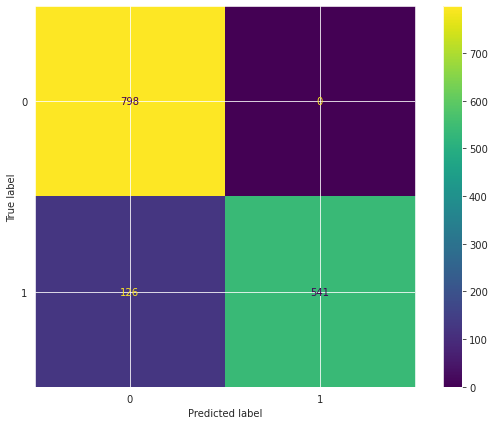

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = random_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=random_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=random_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = random_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       798
           1       1.00      0.81      0.90       667

    accuracy                           0.91      1465
   macro avg       0.93      0.91      0.91      1465
weighted avg       0.93      0.91      0.91      1465



for f1_score: 0.90



KNN

In [ ]:
from sklearn.model_selection import train_test_split

X = data_1.drop(columns='Valence_cat').to_numpy()
y = data_1[['Valence_cat']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_ = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

knn_gridcv_1 = GridSearchCV(knn_, parameters, cv=5, scoring='recall')
knn_gridcv_1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [ ]:
cv_result = pd.DataFrame(knn_gridcv_1.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'n_neighbors': 2, 'weights': 'uniform'}",0.879208,9
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.947327,1
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.918416,3
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.918416,3
4,"{'n_neighbors': 4, 'weights': 'uniform'}",0.847921,12
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.926337,2
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.893069,6
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.892673,7
8,"{'n_neighbors': 6, 'weights': 'uniform'}",0.821782,13
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.905347,5


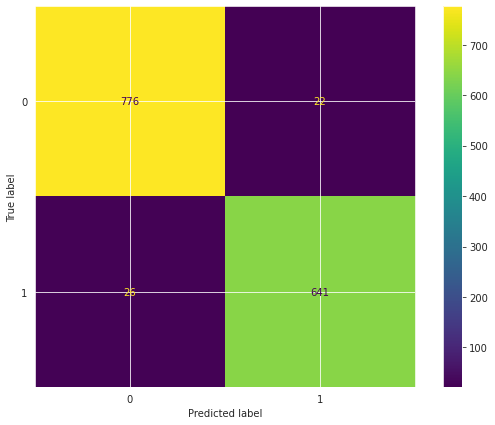

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_gridcv_1.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_gridcv_1.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_gridcv_1.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = knn_gridcv_1.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       798
           1       0.97      0.96      0.96       667

    accuracy                           0.97      1465
   macro avg       0.97      0.97      0.97      1465
weighted avg       0.97      0.97      0.97      1465



for f1_score: 0.96

In [ ]:
dance_range = ["({0} - {1})".format(danceability, danceability + 1.0) for danceability in range(1, 9, 1)]
dance_range

['(1 - 2.0)',
 '(2 - 3.0)',
 '(3 - 4.0)',
 '(4 - 5.0)',
 '(5 - 6.0)',
 '(6 - 7.0)',
 '(7 - 8.0)',
 '(8 - 9.0)']

In [ ]:
count_dance = len(dance_range)
count_dance

8

In [ ]:
data_simple['dance_range_'] = pd.cut(x=data_simple['danceability'], bins=count_dance, labels=dance_range, ordered=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def Dance_cat(x):
  if x <= '(5 - 6.0)':
    return 0
  else:
    return 1


In [ ]:
data_simple['dance_cat'] = data_simple['dance_range_'].apply(Dance_cat)
data_simple

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,popularity,energy,valence,tempo,danceability,valence_range_,Valence_cat,dance_range_,dance_cat
93802,4iJyoBOLtHqaGxP12qzhQI,100,0.696,0.464,90,0.677,(4 - 5.0),0,(6 - 7.0),1
93803,7lPN2DXiMsVn7XUKtOW1CS,99,0.436,0.132,143,0.585,(1 - 2.0),0,(5 - 6.0),0
93804,3Ofmpyhv5UAQ70mENzB277,98,0.695,0.472,149,0.778,(4 - 5.0),0,(7 - 8.0),1
92811,6tDDoYIxWvMLTdKpjFkc1B,97,0.524,0.553,83,0.653,(4 - 5.0),0,(6 - 7.0),1
92810,5QO79kh1waicV47BqGRL3g,97,0.826,0.644,118,0.680,(5 - 6.0),1,(6 - 7.0),1
...,...,...,...,...,...,...,...,...,...,...
188271,0uI7yAKUf52Cn7y3sYyjiX,70,0.518,0.877,151,0.815,(7 - 8.0),1,(7 - 8.0),1
69468,6hFHsQWB7HdVrSe7efRR82,70,0.759,0.917,124,0.791,(7 - 8.0),1,(7 - 8.0),1
78449,5OiaAaIMYlCZONyDBxqk4G,70,0.201,0.383,94,0.468,(3 - 4.0),0,(4 - 5.0),0
211634,3OL6rKs4tpYCdPZ9SEx50p,70,0.572,0.452,89,0.480,(4 - 5.0),0,(4 - 5.0),0


In [ ]:
data_simple['dance_cat'].value_counts()

1    4565
0    2758
Name: dance_cat, dtype: int64

In [ ]:
data_2 = pd.get_dummies(data_simple)
data_2

,popularity,energy,valence,tempo,danceability,Valence_cat,dance_cat,id_003vvx7Niy0yvhvHt4a68B,id_005lwxGU1tms6HGELIcUv9,id_009ImBOrIUlWgla8U05RAC,id_00ETaeHUQ6lops3oWU1Wrt,id_00GOPLxW4PGQuUYdPJh8K1,id_00Mb3DuaIH1kjrwOku9CGU,id_00NAQYOP4AmWR549nnYJZu,id_00QBHaaP4KUcjlmxWriMbC,id_00QN58Gx571pB1MEuBAcmL,id_00cBcYOlnHoXX9ver3cmdE,id_00i0O74dXdaKKdCrqHnfXm,id_00i2HU7TEzzftShjRrDSEF,id_00jpfco62YfQj1BBYCCuKH,id_00ko9WaS4jOX1kEk3gvHjf,id_00lh2JJMF7xsplZhwDT4jv,id_00nvL9u5K8jEJ6TSxGdtPK,id_00qOE7OjRl0BpYiCiweZB2,id_012WiZSgTedjCImYNyA1bF,id_013AWvizllIUEC2FOBzOnh,id_017PF4Q3l4DBUiWoXk4OWT,id_01JPQ87UHeGysPVwTqMJHK,id_01Lr5YepbgjXAWR9iOEyH1,id_01MXkFA8sL7at6txavDErt,id_01Q3OyB05mLgH01fpdAMPP,id_01QdEx6kFr78ZejhQtWR5m,id_01SMtfSbJlcxUdJvOofMOx,id_01TnVDiet1DFTsyWKUKovl,id_01TuObJVd7owWchVRuQbQw,id_01TyFEZu6mHbffsVfxgrFn,id_01beCqR9wsVnwzkAJZyTqq,id_01gUlvzAPiwB9Ekq9kGVCM,id_01jIO8SJFnpSiNLH1JaBZ5,id_01ksPzu3Bw8Lsf9o6xIk8C,...,id_7xoUc6faLbCqZO6fQEYprd,id_7xyYsOvq5Ec3P4fr6mM9fD,id_7y6c07pgjZvtHI9kuMVqk1,id_7y8Qy4I0VWGMEbZvZ0C9x7,id_7y9iMe8SOB6z3NoHE2OfXl,id_7yBbV2k2S2uhaQc24NF2xt,id_7yFhA2fUsL2oIMWlw5DaHQ,id_7yMiX7n9SBvadzox8T5jzT,id_7yNJCsUH3tXlpQiHSsAc5l,id_7ySUcLPVX7KudhnmNcgY2D,id_7ycWLEP1GsNjVvcjawXz3z,id_7ygpwy2qP3NbrxVkHvUhXY,id_7yotKA30dwTKNEGomV9ZsI,id_7yq4Qj7cqayVTp3FF9CWbm,id_7ytR5pFWmSjzHJIeQkgog4,id_7z3N2W7Xz1t2G2sAO8wFVH,id_7zFBtYAVURF3bUVqEQ6UUu,id_7zFXmv6vqI4qOt4yGf3jYZ,id_7zLYKWcXnYeHHWidalz7rj,id_7zVCrzzEJU7u24sbJPXA5W,id_7zXa0myk5r5ex9QfXbjqhY,id_7zkLpY72g6lKQbiHDqri1S,id_7zsXy7vlHdItvUSH8EwQss,id_7zwn1eykZtZ5LODrf7c0tS,id_7zxRMhXxJMQCeDDg0rKAVo,valence_range__(1 - 2.0),valence_range__(2 - 3.0),valence_range__(3 - 4.0),valence_range__(4 - 5.0),valence_range__(5 - 6.0),valence_range__(6 - 7.0),valence_range__(7 - 8.0),dance_range__(1 - 2.0),dance_range__(2 - 3.0),dance_range__(3 - 4.0),dance_range__(4 - 5.0),dance_range__(5 - 6.0),dance_range__(6 - 7.0),dance_range__(7 - 8.0),dance_range__(8 - 9.0)
93802,100,0.696,0.464,90,0.677,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
93803,99,0.436,0.132,143,0.585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
93804,98,0.695,0.472,149,0.778,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
92811,97,0.524,0.553,83,0.653,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
92810,97,0.826,0.644,118,0.680,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188271,70,0.518,0.877,151,0.815,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
69468,70,0.759,0.917,124,0.791,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
78449,70,0.201,0.383,94,0.468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
211634,70,0.572,0.452,89,0.480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
x = data_2.drop(columns='dance_cat').to_numpy()
y = data_2[['dance_cat']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random_ = RandomForestClassifier(random_state=42)

In [ ]:
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth': (1,2,3,4,5)
}

Random_gridcv = GridSearchCV(Random_, parameters, cv=5, scoring='recall')
Random_gridcv.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

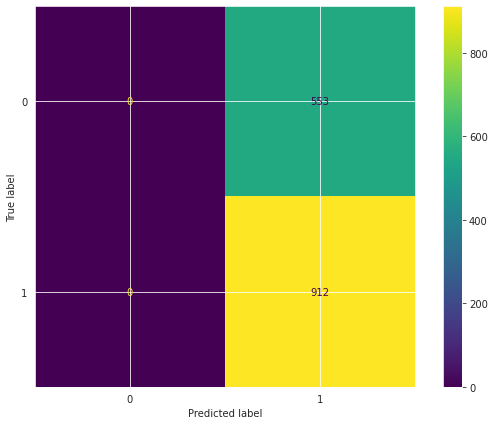

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred = Random_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=Random_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=Random_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
y_pred = Random_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.62      1.00      0.77       912

    accuracy                           0.62      1465
   macro avg       0.31      0.50      0.38      1465
weighted avg       0.39      0.62      0.48      1465



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


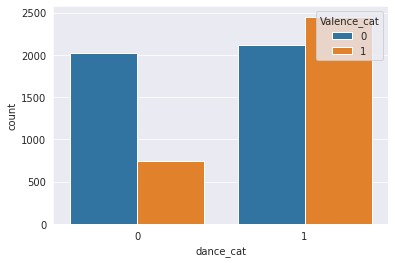

In [ ]:
sns.countplot(data=data_simple, x='dance_cat', hue='Valence_cat')

danceabiity with a value above 0.5 tends to have valence or positiveness in their songs.

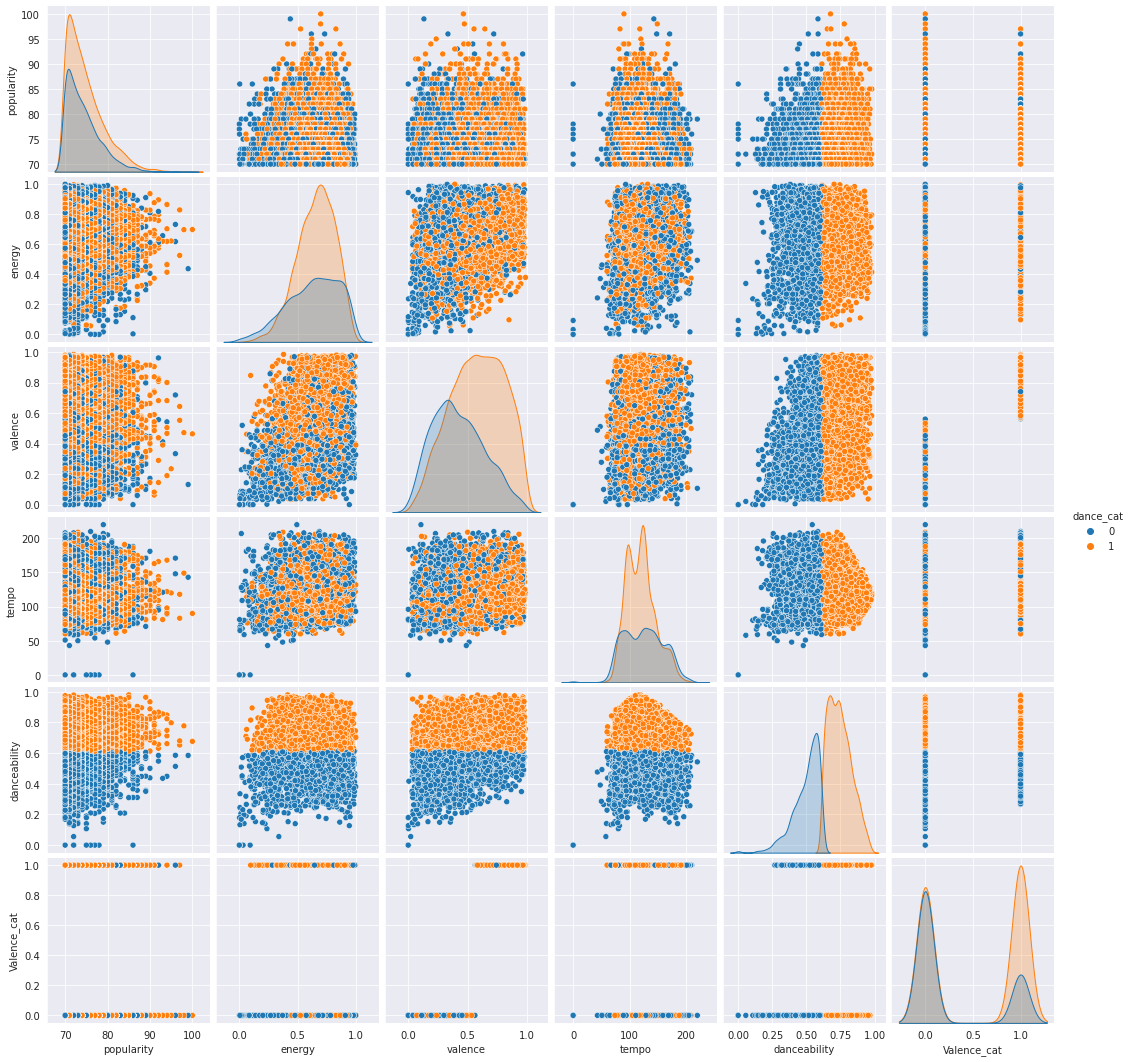

In [ ]:
sns.pairplot(data=data_simple, hue='dance_cat')

On the tempo side, danceability more than 0.5 has a tempo that shows 100 BPM
danceability below 0.5, only distribute energy to 0.4.